In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

import json

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns


## Fixing the million columns

In [2]:
dtypes = {
    'eventid': 'int',
    'iyear': 'int',
    'imonth': 'str',
    'iday': 'str',
    'country_txt': 'category',
    'region_txt': 'category',
    'provstate': 'category',
    'city': 'str',
    'latitude': 'float',
    'longitude': 'float',
    'summary': 'str',
    'crit1': 'int',
    'crit2': 'int',
    'crit3': 'int',
    'doubtterr': 'float',
    'success': 'float',
    'suicide': 'float',
    'attacktype1_txt': 'str',
    'attacktype2_txt': 'str',
    'attacktype3_txt': 'str',
    'targtype1_txt': 'str',
    'targsubtype1_txt': 'str',
    'natlty1_txt': 'str',
    'gname': 'category',
    'motive': 'str',
    'nperps': 'float',
    'nperpcap': 'float',
    'claimed': 'float',
    'weaptype1_txt': 'category',
    'weaptype2_txt': 'category',
    'nkill': 'float',
    'nkillter': 'float',
    'nwound': 'float',
    'propextent_txt': 'str',
    'nhostkid': 'float'
}

In [3]:
df = pd.read_excel('data/globalterrorismdb_0718dist.xlsx', na_values=['nan'], dtype=dtypes, usecols=['eventid', 'iyear', 'imonth', 'iday', 'country','country_txt', 'region_txt','provstate','city','latitude','longitude','summary','crit1','crit2','crit3','doubtterr','success','suicide','attacktype1_txt','attacktype2_txt','attacktype3_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','gname','motive','nperps','nperpcap','claimed','weaptype1_txt','weaptype2_txt','weapdetail','nkill','nkillter','nwound','propextent_txt','nhostkid'])
df

,eventid,iyear,imonth,iday,country,country_txt,region_txt,provstate,city,latitude,longitude,summary,crit1,crit2,crit3,doubtterr,success,suicide,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,motive,nperps,nperpcap,claimed,weaptype1_txt,weaptype2_txt,weapdetail,nkill,nkillter,nwound,propextent_txt,nhostkid
0,-568495615,1970,7,2,58,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,1,1,1,0.0,1.0,0.0,Assassination,NaN,NaN,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,NaN
1,-568495614,1970,0,0,130,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,1,1,1,0.0,1.0,0.0,Hostage Taking (Kidnapping),NaN,NaN,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, consulate)",Belgium,23rd of September Communist League,NaN,7.0,NaN,NaN,Unknown,NaN,NaN,0.0,NaN,0.0,NaN,1.0
2,-567495615,1970,1,0,160,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,1,1,1,0.0,1.0,0.0,Assassination,NaN,NaN,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,NaN
3,-567495614,1970,1,0,78,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,1,1,1,0.0,1.0,0.0,Bombing/Explosion,NaN,NaN,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,NaN,NaN,NaN,Explosives,NaN,Explosive,NaN,NaN,NaN,NaN,NaN
4,-567495613,1970,1,0,101,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,1,1,1,-9.0,1.0,0.0,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,NaN,NaN,NaN,Incendiary,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN
5,-567485614,1970,1,1,217,United States,North America,Illinois,Cairo,37.005105,-89.176269,"1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States. There were no casualties, however, one bullet narrowly missed several police officers. This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.",1,1,1,0.0,1.0,0.0,Armed Assault,NaN,NaN,Police,"Police Building (headquarters, station, school)",United States,Black Nationalists,To protest the Cairo Illinois Police Deparment,-99.0,-99.0,0.0,Firearms,NaN,Several gunshots were fired.,0.0,0.0,0.0,Minor (likely < $1 million),NaN
6,-567475615,1970,1,2,218,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,NaN,1,1,1,0.0,0.0,0.0,Assassination,NaN,NaN,Police,Police Security Forces/Officers,Uruguay,Tupamaros (Uruguay),NaN,3.0,NaN,NaN,Firearms,NaN,Automatic firearm,0.0,NaN,0.0,NaN,NaN
7,-567475614,1970,1,2,217,United States,North America,California,Oakland,37.791927,-122.225906,"1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States. Three transformers were damaged costing an estimated $20,000 to $25,000. There were no casualties.",1,1,1,1.0,1.0,0.0,Bombing/Explosion,NaN,NaN,Utilities,Electricity,United States,Unknown,NaN,-99.0,-99.0,0.0,Explosives,NaN,NaN,0.0,0.0,0.0,Minor (likely < $1 million),NaN
8,-567475613,1970,1,2,217,United States,North America,Wisconsin,Madison,43.076592,-89.412488,"1/2/1970: Karl Armstrong, a member of the New Years Gang, threw a firebomb at R.O.T.C. offices located within the Old Red Gym at the University of Wisconsin in Madison, Wisconsin, United States. There were no casualties but the fire caused around $60,000 in damages to the building.",1,1,1,0.0,1.0,0.0,Facility/Infrastructure Attack,NaN,NaN,Military,Military Recruiting Station/Academy,United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,1.0,1.0,Incendiary,NaN,Firebomb consisting of gasoline,0.0,0.0,0.0,Minor (likely < $1 million),NaN
9,-567465615,1970,1,3,217,United States,North America,Wisconsin,Madison,43.072950,-89.386694,"1/3/1970: Karl Armst

## Reading in Census Bureau populations
Using 2018 population estimations

In [4]:
pops = pd.read_csv("data/scprc-est2018-18+pop-res.csv")

In [5]:
pops.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,10,0,0,0,United States,327167434,253768092,77.6
1,40,3,6,1,Alabama,4887871,3798031,77.7
2,40,4,9,2,Alaska,737438,553622,75.1
3,40,4,8,4,Arizona,7171646,5528989,77.1
4,40,3,7,5,Arkansas,3013825,2310645,76.7


## I only want to look at U.S. events

In [22]:
df = df[(df['country_txt'] == 'United States') & (df.iyear > 2001)]

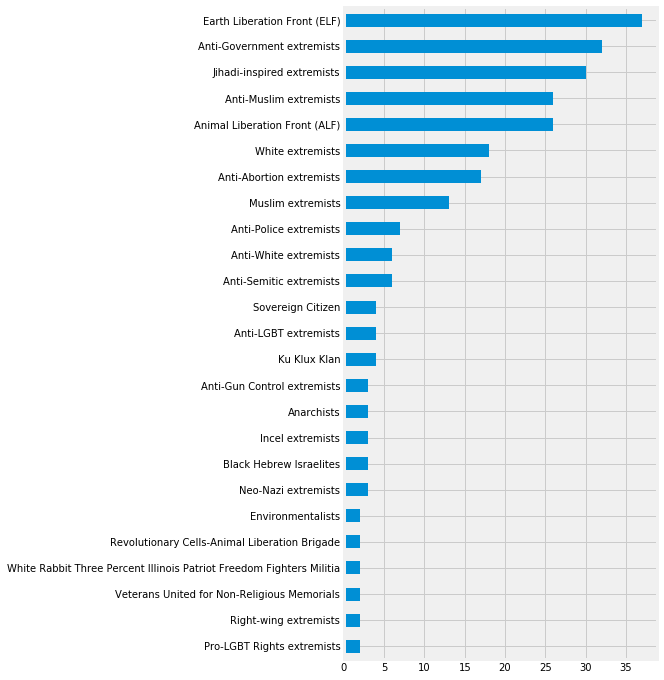

In [23]:
df[df.gname != "Unknown"].gname.value_counts().head(25).sort_values().plot(kind='barh', figsize=(5,12))

In [24]:
df.nkill = df.nkill.astype(str)

In [25]:
## Export for qgis
df.to_csv("data/terrorism_us.csv", index=False)

## Mapbox?

In [29]:
def get_coords(x):
#     geometry = {}
    try:
        try:
            x['place'] = x.city+", "+x.provstate
        except:
            x['place'] = x.city
        x['geometry.type'] = 'Point'
        coords = []
        coords.append(x.longitude)
        coords.append(x.latitude)
        x['geometry.coordinates'] = coords
        return x
    except: 
        return nan

In [36]:
df = df.apply(get_coords, axis=1)

In [37]:
def prop_ids(x):
    if x['attacktype1_txt'] == "Facility/Infrastructure Attack":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#20365E"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 1
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Armed Assault":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#E84C3D"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 2
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Bombing/Explosion":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#D25302"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 3
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Unarmed Assault":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#FDDBB0"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 4
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hostage Taking (Barricade Incident)":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#354A5F"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 5
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Assassination":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#9A59B5"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 6
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hostage Taking (Kidnapping)":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#3598DB"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 7
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hijacking":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#1CBB9B"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 8
        x['properties.radius'] = x.nkill
        return x
    else:
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#1CBB9B"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 9
        x['properties.radius'] = x.nkill
        return x

In [38]:
df = df.apply(prop_ids, axis=1)

In [39]:
def prop_headline(x):
    return x

In [40]:
df['properties.headline'] = df.gname.apply(lambda x: prop_headline(x))

In [41]:
df.head()

,eventid,iyear,imonth,iday,country,country_txt,region_txt,provstate,city,latitude,longitude,summary,crit1,crit2,crit3,doubtterr,success,suicide,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,motive,nperps,nperpcap,claimed,weaptype1_txt,weaptype2_txt,weapdetail,nkill,nkillter,nwound,propextent_txt,nhostkid,properties.name,properties.color,properties_color,properties.group_name,properties.group_id,properties.radius,properties.headline,properties.article,place,geometry.type,geometry.coordinates
73596,-1662412905,2002,1,5,217,United States,North America,Florida,Tampa,27.947354,-82.458750,"1/5/2002: Charles Bishop, a local 15-year-old, stole a Cessna 172R airplane and crashed it into the 28th and 29th floors of the Bank of America Building in downtown Tampa, Florida, United States. Bishop had written a suicide letter claiming to be sympathetic with the 9/11 highjackers and Osama bin Laden, however there is no evidence that he was connected directly to any terrorist organizations. Charles Bishop was the only one who died. There were also no injuries as the building was evacuated before being hit by the plane.",1,1,1,1.0,1.0,1.0,Hijacking,NaN,NaN,Business,Bank/Commerce,United States,Jihadi-inspired extremists,"In a suicide note written by Charles Bishop, he states: ""First of all, Osama bin Laden is absolutely justified in the terror he has caused on 9-11. He has brought a mighty nation to its knees! God blesses him and the others who helped make September 11 happen,"" ""The U.S. will have to face the consequences for its horrific actions against the Palestinian people and Iraqis by its allegiance with the monstrous Israelis who want nothing short of world domination. You will pay God help you and I will (underlined) make you pay. There will be more coming! Al Qaeda and other organizations have met with me several times to discuss the option of me joining. I didn't. This is an operation done by me only. I had no other help, although I am acting on their behalf. Osama bin Laden is planning on blowing up the Super Bowl with an antiquated nuclear bomb left over from the 1967 Israeli-Syrian war.""",1.0,0.0,1.0,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",NaN,Cessna 172R Airplane,1.0,1.0,0.0,Unknown,NaN,Hijacking,#1CBB9B,#1CBB9B,Hijacking,8,1.0,Jihadi-inspired extremists,"<h1 style='font-family:helvetica;font-size:45px'>Jihadi-inspired extremists</h1> <div id='headline'><h2 style='font-family:helvetica;font-size:30px;border-bottom: 5px solid #1CBB9B'>Hijacking</h2></div> <p style='font-size:20px;'><b>Date:</b> 1/5/2002</p> <p style='font-size:20px;'><b>Overview:</b> 1/5/2002: Charles Bishop, a local 15-year-old, stole a Cessna 172R airplane and crashed it into the 28th and 29th floors of the Bank of America Building in downtown Tampa, Florida, United States. Bishop had written a suicide letter claiming to be sympathetic with the 9/11 highjackers and Osama bin Laden, however there is no evidence that he was connected directly to any terrorist organizations. Charles Bishop was the only one who died. There were also no injuries as the building was evacuated before being hit by the plane.</p> <p style='font-size:20px;'><b>People killed:</b> 1.0 people</p> <p style='font-size:20px;'><b>People Wounded:</b> 0.0.</p> <p style='font-size:20px;'><b>Claimed the attack:</b> 1.0</p> <p style='font-size:20px;'><b>Target:</b> Business","Tampa, Florida",Point,"[-82.45875, 27.947354]"
73672,-1662202908,2002,1,26,217,United States,North America,Minnesota,St. Paul,44.943829,-93.093326,"01/26/2002: A trailer and two pieces of heavy machinery were burned at the construction site of the Microbial and Plant Genomics Research Center on the University of Minnesota, St. Paul campus. The Earth Liberation Front (ELF) claimed the attack, stating that the target was attacked for its research on genetically modified crops.",1,1,1,0.0,1.0,0.0,Facility/Infrastructure Attack,NaN,NaN,Educati

In [69]:
def prop_article(row):
    return f"\
    <div id='container'>\
    <h2>{row.gname}</h1>\
    <div id='headline'><h4 style='border-bottom: 5px solid {row.properties_color}'>{row.attacktype1_txt}</h2></div>\
    <p >{row.summary}</p>\
    <p><b>People killed:</b> {row.nkill} people</p>\
    <p><b>People Wounded:</b> {row.nwound}.</p>\
    <p><b>Claimed the attack:</b> {row.claimed}</p>\
    <p><b>Target:</b> {row.targtype1_txt}\
    </div>" 


In [70]:
df['properties.article'] = df.apply(prop_article, axis=1)

In [71]:
df.to_csv("terrorism_us_map.csv", index=False)

In [72]:
map_df = pd.read_csv("terrorism_us_map.csv", thousands=",", usecols=['geometry.coordinates', 'geometry.type', 'properties.name', 'properties.headline', 'properties.article', 'properties.color', 'properties.group_id', 'properties.group_name', 'properties.radius'])

In [73]:
map_df['geometry.coordinates'] = map_df['geometry.coordinates'].apply(json.loads)

In [74]:
ok_json = json.loads(map_df.to_json(orient='records'))

In [75]:
def process_to_geojson(file):
    geo_data = {"type": "FeatureCollection", "features":[]}
    for row in file:
        this_dict = {"type": "Feature", "properties":{}, "geometry": {}}
        for key, value in row.items():
            key_names = key.split('.')
            if key_names[0] == 'geometry':
                this_dict['geometry'][key_names[1]] = value
            if str(key_names[0]) == 'properties':
                this_dict['properties'][key_names[1]] = value
        geo_data['features'].append(this_dict)
    return geo_data

In [76]:
geo_format = process_to_geojson(ok_json)

In [77]:
with open('geo-data.js', 'w') as outfile:
    outfile.write("var infoData = " + json.dumps(geo_format))

## Zooming out to look at each state

In [61]:
state_counts = pd.DataFrame(df['provstate'].value_counts()).reset_index()

In [62]:
state_counts.head()

,index,provstate
0,California,62
1,New York,33
2,Washington,24
3,Florida,24
4,Texas,21


In [63]:
state_counts = state_counts.merge(pops, left_on='index', right_on='NAME')

In [64]:
state_counts['per_capita'] = (state_counts['provstate'] / state_counts['POPESTIMATE2018']) * 10000000
state_counts

,index,provstate,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS,per_capita
0,California,62,40,4,9,6,California,39557045,30567090,77.3,15.673567
1,New York,33,40,1,2,36,New York,19542209,15474107,79.2,16.886525
2,Washington,24,40,4,9,53,Washington,7535591,5872306,77.9,31.848862
3,Florida,24,40,3,5,12,Florida,21299325,17070244,80.1,11.267963
4,Texas,21,40,3,7,48,Texas,28701845,21303746,74.2,7.316603
5,Virginia,16,40,3,5,51,Virginia,8517685,6647893,78.0,18.784447
6,Missouri,13,40,2,4,29,Missouri,6126452,4749622,77.5,21.219459
7,Pennsylvania,13,40,1,2,42,Pennsylvania,12807060,10158149,79.3,10.150651
8,New Mexico,11,40,4,8,35,New Mexico,2095428,1613275,77.0,52.495242
9,Nebraska,11,40,2,4,31,Nebraska,1929268,1452427,75.3,57.016444


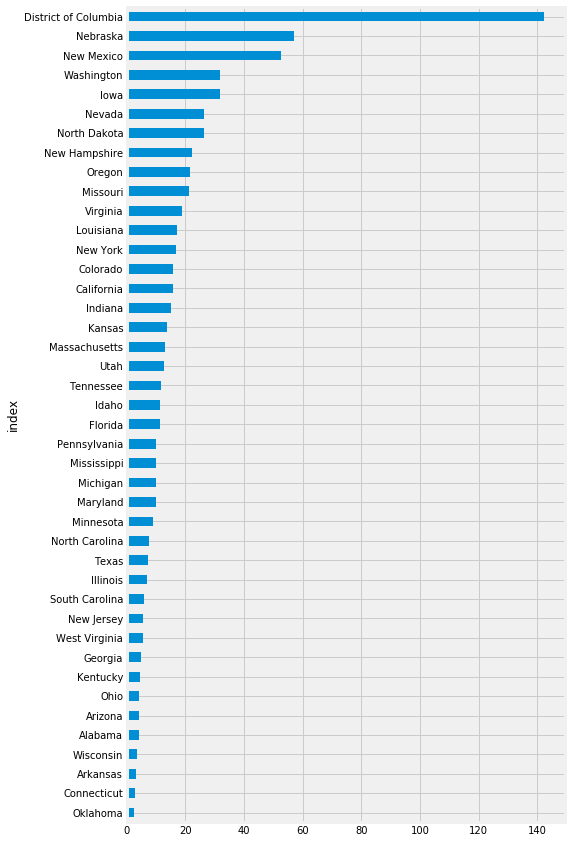

In [67]:
state_counts.sort_values(by='per_capita').plot(kind="barh", x='index', y='per_capita', figsize=(7,15), legend=False)

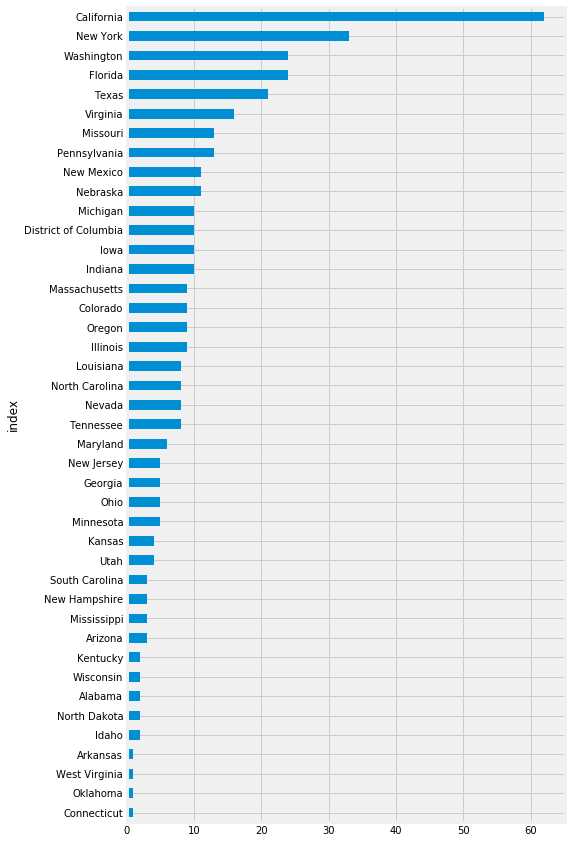

In [68]:
state_counts.sort_values(by='provstate').plot(kind="barh", x='index', y='provstate', figsize=(7,15), legend=False)